# Introdução à Computação Simbólica com _sympy_

## Motivação

Neste ponto do curso, você já aprendeu a realizar operações matemáticas elementares com Python. Por exemplo, se lhe for dado o valor do raio $R$, você consegue facilmente computar a área $\pi R^2$ de um círculo. Todavia, o valor de $\pi$ que você obtém é finito. As instruções abaixo verificam isto.   

```python
from math import pi
print(pi)
3.141592653589793
```

Pense, no entanto, se você pudesse realizar o cálculo desta área de maneira "exata". Matematicamente falando, é impossível fazer isto pois $\pi$ é um número irracional – o imbróglio desta constante é longo na história da Matemática. Porém, a computação simbólica permite que operemos com $\pi$ como se fosse simplesmente um símbolo com precisão infinita. Embora 15 casas decimais, como o valor exemplificado acima, sejam suficientes para a maioria dos cálculos do mundo real, a computação simbólica permite que trabalhemos com modelos abstratos que servem a uma diversidade de propósitos. 

Aliás, quando se diz que 3.141592653589793 é um valor razoavelmente aceitável, isto é verdade até mesmo para cálculos em escala astronômica. A equipe de engenharia da NASA explica que, usando este valor para calcular o perímetro de uma circunferência com diâmetro igual a 25 bilhões de milhas, o erro de cálculo é próximo de 1,5 polegada [[NASA]](https://www.jpl.nasa.gov/edu/news/2016/3/16/how-many-decimals-of-pi-do-we-really-need/). Até aí, nada mal para uma aproximação!

## O que é Computação Simbólica e para que serve? 

*Computação Simbólica* (CS) é uma subárea de estudo da matemática e da ciência da computação que se preocupa em resolver problemas usando objetos simbólicos representáveis em um computador. Esses problemas surgem em muitas aplicações em ciências naturais, pesquisa básica, na indústria e principalmente no desenvolvimento de softwares para computação avançada denominados _sistemas de computação algébrica_ (SCAs). 

A CS existente em um SCA é aplicada em álgebra computacional, projetos assistidos por computação (CAD), raciocínio automatizado, gestão do conhecimento, lógica computacional e sistemas formais de verificação. O desenvolvimento da CS depende da integração de basicamente três campos: *softwares matemáticos*, *álgebra computacional* e *lógica computacional* [[RISC/JKU]](https://risc.jku.at/studying-symbolic-computation/). Em casos mais avançados, a CS é útil para solucionar equações da macroeconomia, manipular números para a finalidade de criptografia e criar modelos probabilísticos [[Kotzé]](https://kevinkotze.github.io/mm-tut1-symbolic/), [[Cohen]](https://www.ukma.edu.ua/~yubod/teach/compalgebra/%5BJoel_S._Cohen%5D_Computer_algebra_and_symbolic_comp(BookFi.org).pdf). 

## Principais SCAs 

Alguns SCAs são populares de longa data, tais como Maple, Mathematica e MuPad. Entretanto, são comerciais e costumam ter licenças custosas, embora ofereçam versões com desconto para estudantes. Algumas alternativas robustas de uso livre são Scilab, Sagemath, Octave e o próprio módulo *sympy*. Uma lista completa de SCAs está disponível na [[Wikipedia]](https://en.wikipedia.org/wiki/Computer_algebra_system).

## Por que *sympy*? 

O objetivo principal do *sympy* é ser uma biblioteca de manipulação simbólica para Python. Ele começou a ser desenvolvido em 2006 e atualmente está na versão 1.5.1, lançada em dezembro de 2019 na página oficial [[sympy.org]](https://www.sympy.org/pt/index.html). As principais características do módulo são as seguintes: 

- é gratuito;

- é baseado inteiramente em Python;

- é leve e independente.

## Objetos numéricos x objetos simbólicos

Importaremos os módulos `math` e `sympy` para ver algumas  diferenças entre objetos numéricos e simbólicos.

In [1]:
import math as mt
import sympy as sy
sy.init_printing(pretty_print=True) # melhor impressão de símbolos

In [2]:
mt.pi # numérico

In [3]:
sy.pi # simbólico

Verifiquemos com `type`.

In [4]:
type(mt.pi)

float

In [5]:
type(sy.pi) # é um objeto simbólico

sympy.core.numbers.Pi

Vejamos mais um exemplo:

In [6]:
mt.sqrt(2)

In [7]:
sy.sqrt(2)

In [8]:
type(mt.sqrt(2))

float

In [9]:
type(sy.sqrt(2)) # é um objeto simbólico

sympy.core.power.Pow

### Função x método 

Na aula anterior destacamos que `print` e `type` são "funções" similares àquelas do tipo $y = f(x)$ em Matemática. Em Python, essas "funções" recebem o nome de *função* mesmo.

Porém, há módulos que possuem *métodos*, que para seu entendimento, podem ser vistos como "funções" também. Porém, *função* e *método* são conceitos levemenete distintos. 

Para aplicarmos funções usamos parênteses envolvendo um ou mais *parâmetros*. 

No caso acima, `mt.sqrt(2)` mostra que `sqrt` age como uma função e o número 2 é seu único parâmetro. Note, além disso, que o sympy também possui a sua própria função `sqrt`, que é de uma natureza distinta. Ela é um objeto `sympy.core.power.Pow`. Não precisamos entender isso agora, mas basta saber que ela pertence a um submódulo do *sympy*.

Por outro lado, também aprendemos que o conjugado de um número complexo `z` (tipo `complex`) pode ser obtido como `z.conjugate()`. Esta forma "sem parâmetros" indica que `conjugate` é um método do objeto `z`.

A partir deste ponto, poderemos ver situações como as seguintes:

- `f(x)`: a função `f` é aplicada ao parâmetro `x`

- `a.f()`: `f` é um método sem parâmetro do objeto `a`

- `a.f(x)`: `f` é um método com parâmetro `x` do objeto `a`

A partir do último exemplo, podemos dizer que um método é, na verdade, uma função que pertence a um objeto.

### Atribuições com símbolos

Podemos atribuir símbolos a variáveis usando a função `symbols`.

In [10]:
x = sy.symbols('x')
y = sy.symbols('y')

`x` e `y` são símbolos sem valor definido.

In [11]:
x

In [12]:
y

Podemos operar aritmeticamente com símbolos e obter uma expressão simbólica como resultado.

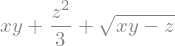

In [13]:
z = sy.symbols('z')
x*y + z**2/3 + sy.sqrt(x*y - z)

**Exemplo**: escreva o produto notável $(x - y)^2$ como uma expressão simbólica.

In [14]:
x**2 - 2*x*y + y**2

Note que o nome da variável não tem a ver com o nome do símbolo. Poderíamos fazer o seguinte:

In [15]:
y = sy.symbols('x') # y é variável; x é símbolo
y

### Atribuição por desempacotamento 

Também poderíamos realizar as atribuições anteriores da seguinte forma: 

In [16]:
x, y, z = sy.symbols('x y z')

### Alfabeto de símbolos 

O *sympy* dispõe de um submódulo chamado `abc` do qual podemos importar símbolos para letras latinas (maiúsculas e minúsculas) e gregas (minúsculas).

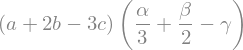

In [17]:
from sympy.abc import a,b,c,alpha,beta,gamma
(a + 2*b - 3*c)*(alpha/3 + beta/2 - gamma) # símbolico

In [18]:
from sympy.abc import D,G,psi,theta
D**a * G**b * psi**c * theta**2 # símbolico

**Nota**: algumas letras já são usadas como símbolos especiais, tais como `O`, que indica "ordem" e `I`, que é o complexo $i$. Neste caso, cuidado deve ser tomado com nomes de variáveis

In [19]:
sy.I # imaginário simbólico

In [20]:
type(sy.I)

sympy.core.numbers.ImaginaryUnit

### Símbolos com nomes genéricos

Para criar símbolos genéricos, temos de usar `symbols` ou `Symbol`.

In [21]:
sem_nocao = sy.symbols('nada')
sem_nocao

In [22]:
muito_louco = sy.Symbol('massa')
muito_louco

### Variáveis e símbolos

In [23]:
sem_medo = sem_nocao + 2
sem_medo 

In [24]:
soma = muito_louco + 2
muito_louco = 3 # 'muito_louco' aqui não é o simbólico
soma

## Substituição

A operação de *substituição* permite que: 

1. substituamos variáveis por valores numéricos para avaliar uma expressão ou calcular valores de uma função em um dado ponto.
2. substituamos uma subexpressão por outra.

Para tanto, procedemos da seguinte forma: 

```python
expressao.subs(variavel,valor)
```


**Exemplo**: considere o polinômio $P(x) = 2x^3 - 4x -6$. Calcule o valor de $P(-1)$, $P(e/3)$, $P(\sqrt{3.2})$.

In [25]:
from sympy.abc import x 
P = 2*x**3 - 4*x - 6
P1 = P.subs(x,-1)
Pe3 = P.subs(x,mt.e/3)
P32 = P.subs(x,mt.sqrt(3.2))
print(P1, Pe3, P32)

-4 -8.13655822141297 -1.70674948320040


**Exemplo:** sejam $f(x) = 4^x$ e $g(x) = 2x - 1$. Compute o valor da função composta $f(g(x))$ em $x = 3$. 

In [26]:
f = 4**x
fg = f.subs(x,2*x - 1)

In [27]:
fg.subs(x,3)

Poderíamos também fazer isso com um estilo "Pythônico":

In [28]:
fg = 4**x.subs(x,2*x - 1).subs(x,3)
fg

**Exemplo:** se $a(x) = 2^x$, $b(x) = 6^x$ e $c(x) = \cos(x)$, compute o valor de $a(x)b(c(x))$ em $x = 4$

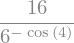

In [29]:
a = 2**x
b = 6**x
c = sy.cos(x)
(a * b.subs(x,c)).subs(x,4)

Ou, de modo direto:

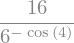

In [30]:
valor = ( 2**x * ( 6**x.subs(x,sy.cos(x))) ).subs(x,4)
valor

### Avaliação de expressão em ponto flutuante

Note que a expressão anterior não foi computada em valor numérico. Para obter seu valor numérico, podemos usar o método `evalf`.

In [31]:
valor.evalf()

#### Precisão arbitrária 

`evalf` permite que escolhamos a precisão do cálculo impondo o número de dígitos de precisão. Por exemplo, a última expressão com 20 dígitos de precisão seria:

In [32]:
valor.evalf(20)

Com 55, seria:

In [33]:
valor.evalf(55)

E com 90 seria:

In [34]:
valor.evalf(90)

**Exemplo**: calcule o valor de $e$ com 200 dígitos de precisão.

In [35]:
sy.exp(1).evalf(200)

## Funções predefinidas x funções regulares

Vamos apresentar aqui três grupos de funções que podem ser criadas em Python para nos auxiliar ao longo do curso sem, no entanto, nos aprofundaremos nos detalhes de cada um. 

Como dissemos em um momento anterior, a linguagem Python possui um *core* que contém um conjunto de funções já prontas que podemos usar, como é o caso de `print()`, `type()` e até mesmo `int()` e `float()` para operações de *casting*. Essas funções podem ser chamadas de **predefinidas** (*built-in functions*). Ou seja, são aquelas funções "já existentes". Exemplos adicionais seriam as funções do módulo `math`.

Suponhamos, porém, que você vasculhe módulos e mais módulos atrás de uma função que faça exatamente o que você quer, mas não a encontra. O que você faz? Você a cria! Podemos fazer isto de uma maneira usando uma "palavra-chave" (*keyword*) chamada `def` da seguinte forma:

```python
def f(x):
    (...)
    return y
```
A instrução acima permite que você crie uma *função* chamada `f` da qual `x` é um *argumento* e `y` é um *valor de retorno*, indicado por uma segunda "palavra-chave", *return*. Funções definidas por você dessa maneira são chamadas de **regulares**, *normais* – pelo fato de serem programadas de um modo regular, seguindo a "normalidade" da linguagem –, ou ainda *definidas pelo usuário* (do inglês *user-defined functions*, ou simplesmente *UDF*). Por conveniência, vamos nos referir a elas por este acrônimo elegante: UDF. 

Uma UDF permite que você abstraia seu pensamento para criar basicamente o que quiser dentro dos limites da linguagem Python. Cabe, apesar disso, fazermos as seguintes ressalvas: 

- uma UDF **pode ter zero ou mais argumentos**, tantos quantos se queira;
- uma UDF **pode ou não ter valor de retorno**;

Vamos entender as UDFs com exemplos.

**Exemplo:** Suponha que você é um(a) analista de dados do mercado imobiliário e está estudando o impacto do repasse de comissões pagas a corretores mediante vendas de imóveis. Você, então, começa a raciocinar e cria um modelo matemático bastante simples que, antes de tudo, precisa calcular o valor do repasse a partir do preço de venda. 

Se $c$ for o percentual de comissão, $V$ o valor da venda do imóvel e $r$ o valor a ser repassado para o corretor, então, a função a ser definida é 

$$r(V) = c\, V,$$ 

assumindo que $c$ seja um valor fixo. 

Digamos que $c$ corresponda a 1.03% do valor da venda do imóvel. Neste caso podemos criar uma UDF para calcular $r$ para nós da seguinte forma:

In [36]:
def repasse(V): 
    r = 0.0103*V  
    return r

Para $V = \, R\$ \, 332.130,00$:

In [37]:
repasse(332130)

O que é necessário observar:

- `def` vem seguido pelo *nome* da função (`repasse`) após um espaço;
- o nome precede os argumentos, enclausurados por parênteses `(V)`. Neste caso, temos apenas um *argumento*, que é `V`;
- após o nome, os dois-pontos (`:`) são obrigatórios e significam mais ou menos "o que esta função faz será definido da seguinte maneira"
- a instrução `r = 0.0103*V` é o *escopo* da função, que deve ser escrito em uma ou mais linhas indentadas (pressione `TAB` para isso, ou use 4 espaços)
- o valor de retorno, se houver, é posto na última linha do escopo.

Podemos atribuir os valores do argumento e resultado a variáveis:

In [38]:
V = 332130
rep = repasse(V)
rep

Nomes iguais de variável e função são permissíveis.

In [39]:
repasse = repasse(V) # 'repasse' à esquerda é uma variável; à direita, função
print(repasse)

3420.939


Todavia, isto pode ser confuso e é bom evitar.

O estilo "Pythônico" de escrever permite que o valor de retorno não seja explicitamente declarado. No escopo

```python
...
    r = 0.0103*V  
    return r
```
 a variável `r` não é necessária.
 
Python é inteligente para permitir o seguinte:

In [40]:
def repasse(V): 
    return 0.0103*V

# note que aqui não indentamos a linha. 
# Logo esta instrução NÃO pertence ao escopo da função.
repasse(V)

Podemos criar uma função para diferentes valores de `c` e `V` usando *dois* argumentos:

In [41]:
def repasse_c(c,V): # esta função tem outro nome
    return c*V

In [42]:
c = 0.0234 # equivaleria a uma taxa de repasse de 2.34%
V = 197432 # o valor do imóvel agora é R$ 197.432,00
repasse_c(c,V)

A ordem dos argumentos importa:

In [43]:
V = 0.0234 # este deveria ser o valor de c
c = 197432 # este deveria ser o valor de V
repasse_c(c,V)

Por que o valor resultante é o mesmo? Porque a operação no escopo da função é uma multiplicação, `c*V`, que é comutativa independentemente do valor das variáveis. Porém, digamos que um segundo modelo tenha uma forma de cálculo distinta para a comissão dada por

$$r_2(V) = c^{3/5} \, V$$

Neste caso:

In [44]:
def repasse_2(c,V):
    return c**(3/5)*V

V = 197432
c = 0.0234

repasse_2(c,V)

Porém, se trocarmos o valor das variáveis, a função `repasse_2` calculará um valor distinto. Embora exista um produto também comutativo, o expoente `3/4` modifica apenas o valor de `c`.

In [45]:
# variáveis com valores trocados
c = 197432
V = 0.0234

repasse_2(c,V)

A ordem com que escrevemos os argumentos tem importância relativa aos valores que passamos e ao que definimos: 

In [46]:
# variáveis com valores corretos
V = 197432
c = 0.0234

def repasse_2_trocada(V,c): # V vem antes de c
    return c**(3/5)*V
    
repasse_2_trocada(V,c)

Mas,

In [47]:
# os valores das variáveis estão corretos, 
# mas foram passados para a função na ordem errada
repasse_2_trocada(c,V) 

e 

In [48]:
# a ordem dos argumentos está de acordo com a que foi definida
# mas os valores das variáveis foram trocados
V = 197432
c = 0.0234
repasse_2_trocada(c,V) 

## Modelos matemáticos simbólicos

A partir do que aprendemos, podemos definir modelos matemáticos completamente simbólicos.

In [49]:
from sympy.abc import c,V

def repasse_2_simbolica(c,V):
    return c**(3/5)*V

Se chamarmos esta função, ela será um objeto simbólico.

In [50]:
repasse_2_simbolica(c,V)

Atribuindo em variável:

In [51]:
rep_simb = repasse_2_simbolica(c,V)

In [52]:
type(rep_simb) # é um objeto simbólico

sympy.core.mul.Mul

**Exemplo:** Suponha, agora, que seu modelo matemático de repasse deva considerar não apenas um percentual $c$ pré-estabelecido, mas também um valor de "bônus" adicional concedido como prêmio pela venda do imóvel. Considere, então, que o valor deste bônus seja $b$. Diante disso, nosso novo modelo teria uma fórmula como a seguinte: 

$$r_3(V) = c\,V + b$$

Simbolicamente:

In [53]:
# importaremos apenas o símbolo b, 
# uma vez que c e V já foram importados 
# como símbolos anteriormente
from sympy.abc import b 

def r3(V):
    return c*V + b

rep_3 = r3(V)
rep_3

### Substituindo valores

Podemos usar a função `subs` para atribuir quaisquer valores para o modelo.

**Exemplo:** $c = 0.119$

In [54]:
rep_3.subs(c,0.119) # substituindo para c

**Exemplo:** $c = 0.222$

In [55]:
rep_3.subs(c,0.222) # substituindo para c

**Exemplo:** $c = 0.222$ e $b = 12.0$

In [56]:
rep_3.subs(c,0.222).subs(b,12.0) # substituindo para c, depois para b

### Substituição múltipla

O modo anterior de substituição não é "Pythônico". Para substituirmos mais de uma variável de uma vez, devemos usar *pares ordenados* separados por vírgula sequenciados entre colchetes como uma *lista*. Mais tarde, aprenderemos sobre pares ordenados e listas.

**Exemplo:** Modifique o modelo $r_3$ para que $c = 0.043$ e $b = 54.0$

In [57]:
# espaços foram adicionados para dar legibilidade
rep_3.subs( [ (c,0.043), (b,54.0) ] )

#### Pares ordenados

Em matemática, o conceito de par ordenado pode ser definido pelo conjunto: 

$$ X \times Y = \{ (x,y) ; x \in X \text{ e } y \in Y \},$$

onde $X$ e $Y$ são conjuntos quaisquer e $x$ e $y$ são as *coordenadas*. Por exemplo, se $X = Y = \mathbb{R}$, o conjunto acima contém elementos do tipo $(3,2)$, $(-1,3)$, $(\pi,2.18)$ etc. Na verdade, eles formam o conjunto $\mathbb{R} \times \mathbb{R} = \mathbb{R}^2$, que é exatamente o *plano cartesiano*.

Logo, a substituição múltipla com `subs` ocorre da seguinte forma; 

- a primeira coordenada é o *símbolo*;

- a segunda coordenada é o *valor* que você quer dar para o símbolo.

**Exemplo:** Calcule $r_3(V)$ considerando $c = 0.021$, $b = 34.0$ e $V = 432.000$.

In [58]:
# armazenaremos o valor na variável 'valor'
valor = r3(V)

# subsituição 
valor.subs( [ (c,0.021), (b,54.0) ] )

Com o estilo "Pythônico":

In [59]:
valor = r3(V).subs( [ (c,0.021), (b,54.0) ] ) # 
valor

Podemos seguir esta regra de pares para substituir todos os valores de um modelo simbólico genérico não necessariamente definido através de uma função. Veja o exemplo aplicado a seguir.

## Exemplo de aplicação: o índice de caminhabilidade

Estudos empíricos nos EUA mostraram que a *caminhabilidade* de uma vizinhança impacta substancialmente os preços das casas. A caminhabilidade está relacionada à distância da moradia a locais de amenidades, tais como restaurantes, bares, bibliotecas, mercearias etc.

O *índice de caminhabilidade* $W$ para uma vizinhança de casas é uma medida matemática que assume valores no intervalo $[0,1]$. A fórmula é definida por: 

$$W(d) = e^{-5 \left( \dfrac{d}{M} \right)^5},$$

onde $d$ é a distância medida entre a vizinhança (0 metro) e um dado ponto de referência, e $M$ é a distância máxima de avaliação considerada a partir da qual a caminhabilidade é assumida como nula. Ou seja, 

- quando estamos na vizinhança, $d = 0$, $W = 1$ e a caminhabilidade é considerada ótima.

- à medida que nos afastamos da vizinhança em direção ao local da amenidade, $d$ aumenta e o valor $W$ decai vertiginosamente até atingir o valor limite $M$ a partir do qual $W = 0$ e a caminhabilidade é considerada "péssima". 

O índice de caminhabilidade é, portanto, calculado com relação a um ponto de destino definido e a distância deve levar em consideração as vias de circulação (ruas, rodovias etc) e não a distância mais curta (raio do perímetro). Por exemplo, se a distância máxima a ser considerada para a caminhabilidade for $M = 500 \, m$ , um bar localizado a 100 metros da vizinhança teria um índice de caminhabilidade maior do que o de uma farmácia localizada a 300 m e muito maior do que o de um shopping localizado a 800 m, ainda que muito famoso. Aliás, neste caso, o valor de $W$ para o shopping seria zero, já que 800 m está além do limite $M$ estabelecido.

Fonte: *De Nadai, M. and Lepri, B. [[The economic value of neighborhoods: Predicting real estate prices from the urban environment]](https://arxiv.org/pdf/1808.02547.pdf)*. 

### Modelo simbólico

Podemos modelar $W$ simbolicamente e calcular seu valor para diferentes valores de $d$ e $M$ usando a substituição múltipla.

In [60]:
from sympy.abc import d,M,W 

W = sy.exp(-5*(d/M)**5) # função exponencial simbólica
W

**Exemplo:** A nossa corretora de imóveis gostaria de entender a relação de preços de imóveis para o Condomínio Pedras de Marfim. Considerando $M = 1 km$, calcule:
        
- o índice de caminhabilidade $W_1$ em relação à farmácia Dose Certa, localizada a 222 m do condomínio.

- o índice de caminhabilidade $W_2$ em relação ao restaurante Sabor da Arte, localizada a 628 m do condomínio.

- o índice de caminhabilidade $W_3$ em relação ao Centro Esportivo Physicalidade, localizada a 998 m do condomínio.

- o índice de caminhabilidade $W_4$ em relação à Padaria Dolce Panini, localizada a 1,5 km do condomínio.

In [61]:
# note que 1 km = 1000 m
W1 = W.subs([ (d,222), (M,1000) ]) 
W2 = W.subs([ (d,628), (M,1000) ]) 
W3 = W.subs([ (d,998), (M,1000) ]) 
W4 = W.subs([ (d,1500), (M,1000) ])

Perceba, entretanto, que os valores calculados ainda não são numéricos, como esperado.

In [62]:
W1

In [63]:
W2

In [64]:
W3

In [65]:
W4

Lembre-se que podemos usar `evalf` para calcular esses valores. Faremos isso considerando 3 casas decimais.

In [66]:
# reatribuindo todos os valores
W1n = W1.evalf(3)
W2n = W2.evalf(3)
W3n = W3.evalf(3)
W4n = W4.evalf(3)

print('W1 =', W1n, '; ' \
      'W2 =', W2n, '; ' \
      'W3 =', W3n, '; ' \
      'W4 =', W4n)       

W1 = 0.997 ; W2 = 0.614 ; W3 = 0.00708 ; W4 = 3.24e-17


Como era de se esperar, os valores decaem de 0.997 a 3.24e-17, que é um valor considerado nulo em termos de aproximação numérica.

#### Quebrando instruções com `\`

A contra-barra `\` pode ser usada para quebrar instruções e continuá-las nas próximas linhas, porém não poderá haver nenhum caracter após ela, nem mesmo espaços. Caso contrário, um erro será lançado.

In [67]:
print('Continuando' \
      'na linha abaixo')

Continuandona linha abaixo


In [68]:
# neste exemplo, há um caracter de espaço após \
print('Continuando' \ 
      'na linha abaixo')

SyntaxError: unexpected character after line continuation character (<ipython-input-68-322bd86bfa93>, line 2)

### O tipo `bool`

Em Python, temos mais um tipo de dado bastante útil, o `bool`, que é uma redução de "booleano". Objetos `bool`, que têm sua raiz na chamada Álgebra de Boole, são baseados nos conceitos *true* (verdadeiro) e *false*, ou *0* e *1* e são estudados em algumas disciplinas, tais como Circuitos Lógicos, Matemática Discreta, Lógica Aplicada, entre outras. 

Aprenderemos sobre operadores lógicos mais à frente. Por enquanto, cabe mencionar as entidades fundamentais `True` e `False`. 

In [69]:
True

True

In [70]:
False

False

In [71]:
type(True)

bool

In [72]:
type(False)

bool

Podemos realizar testes lógicos para concluir verdades ou falsidades quando temos dúvidas sobre objetos e relações entre eles. Por exemplo, retomemos os seguintes valores:

In [73]:
W1

In [74]:
W2

A princípio, é difícil determinar qual dos dois é o maior. Porém, podemos realizar "perguntas" lógicas para o interpretador Python com operadores lógicos. Mostraremos apenas dois exemplos com `>` e `<`.

In [75]:
W1 > W2 # isto quer dizer: "W1 é maior do que W2?"

O valor `True` confirma que o valor de `W1` é maior do que `W2`. 

In [76]:
W4 < 0

Note que, de acordo com nosso modelo de caminhabilidade, este valor deveria ser zero. Porém, numericamente, ele é uma aproximação para zero. Embora muito pequeno, não é exatamente zero! Por que isso ocorre? Porque o computador lida com uma matemática inexata e aproximada, mas com precisão satisfatória.

## Operadores lógicos

Vimos que `True` e `False` são os dois valores atribuíves a um objeto de tipo `bool`. Eles são úteis para testar condições, realizar verificações e comparar quantidades. Vamos estudar *operadores de comparação*, *operadores de pertencimento* e *operadores de identidade*.

### Operadores de comparação

A tabela abaixo resume os operadores de comparação utilizados em Python.

| operador | significado | símbolo matemático | 
|---|---|---| 
| `<` | menor do que | $<$ |
| `<=` | menor ou igual a | $\leq$ |
| `>` | maior do que | $>$ |
| `>=` | maior ou igual a | $\geq$ |
| `==` | igual a | $=$ |
| `!=` | diferente de | $\neq$ |

Podemos usá-los para comparar objetos. 

**Nota:** `==` está relacionado à igualdade, ao passo que `=` é uma atribuição. São conceitos operadores com finalidade distinta. 

In [77]:
2 < 3 # o resultado é um 'bool'

True

In [78]:
5 < 2 # isto é falso

False

In [79]:
2 <= 2 # isto é verdadeiro

True

In [80]:
4 >= 3 # isto é verdadeiro

True

In [81]:
6 != -2 

True

In [82]:
4 == 4 # isto não é uma atribuição! 

True

Podemos realizar comparações aninhadas:

In [83]:
x = 2
1 < x < 3

True

In [84]:
3 > x > 4

False

In [85]:
2 == x > 3 

False

As comparações aninhadas acima são resolvidas da esquerda para a direita e em partes. Isso nos leva a introduzir os seguintes operadores.

| operador | símbolo matemático | significado | uso relacionado a |
|---|---|---|---|
| `or` | $\vee$ | "ou" booleano | união, disjunção |
| `and` | $\wedge$ | "e" booleano | interseção, conjunção |
| `not` | $\neg$ | "não" booleano | exclusão, negação |

In [86]:
# parênteses não são necessários aqui
(2 == x) and (x > 3) # 1a. comparação: 'True'; 2a.: 'False'. Portanto, ambas: 'False'

False

In [87]:
# parênteses não são necessários aqui
(x < 1) or (x < 2) # nenhuma das duas é True. Portanto, 

False

In [88]:
not (x == 2) # nega o "valor-verdade" que é 'True'

False

In [89]:
not x + 1 > 3 # estude a precedência deste exemplo. Por que é 'True'?

True

In [90]:
not (x + 1 > 3) # estude a precedência deste exemplo. Por que também é 'True'?

True

### Operadores de pertencimento

A tabela abaixo resume os operadores de pertencimento. 

| operador | significado | símbolo matemático
|---|---|---|
| `in` | pertence a | $\in$ |
| `not in` | não pertence a | $\notin$ |

Eles terão mais utilidade quando falarmos sobre sequências, listas. Neste momento, vejamos exemplos com objetos `str`.

In [91]:
'2' in '2 4 6 8 10' # o caracter '2' pertence à string

True

In [92]:
frase_teste = 'maior do que' 
'maior' in frase_teste

True

In [93]:
'menor' in frase_teste # a palavra 'menor' está na frase

False

In [94]:
1 in 2 # 'in' e 'not in' não são aplicáveis aqui

TypeError: argument of type 'int' is not iterable

### Operadores de identidade

A tabela abaixo resume os operadores de identidade. 

| operador | significado 
|---|---|
| `is` | "aponta para o mesmo objeto" 
| `is not` | "não aponta para o mesmo objeto" |

Esses operadores são úteis para verificar se duas variáveis se referem ao mesmo objeto. Exemplo: 

```python
a is b
a is not b
```

- `is` é `True` se `a` e `b` se referem ao mesmo objeto; `False`, caso contrário.
- `is not` é `False` se `a` e `b` se referem ao mesmo objeto; `True`, caso contrário.

In [95]:
a = 2
b = 3
a is b # valores distintos

False

In [96]:
a = 2
b = a
a is b # mesmos valores

True

In [97]:
a = 2
b = 3
a is not b # de fato, valores não são distintos

True

In [98]:
a = 2
b = a
a is not b # de fato, valores são distintos

False

## Equações simbólicas

Equações simbólicas podem ser formadas por meio de `Eq` e não com `=` ou `==`.

In [99]:
# importação
from sympy.abc import a,b
import sympy as sy 
sy.init_printing(pretty_print=True)

In [100]:
sy.Eq(a,b) # equação simbólica

In [101]:
sy.Eq(sy.cos(a), b**3) # os objetos da equação são simbólicos

### Resolução de equações algébricas simbólicas

Podemos resolver equações algébricas da seguinte forma:

```python
solveset(equação,variável,domínio)
```

**Exemplo:** resolva $x^2 = 1$ no conjunto $\mathbb{R}$.

In [102]:
from sympy.abc import x
sy.solveset( sy.Eq( x**2, 1), x,domain=sy.Reals)

Podemos reescrever a equação como: $x^2 - 1 = 0$.

In [103]:
sy.solveset( sy.Eq( x**2 - 1, 0), x,domain=sy.Reals)

Com `solveset`, não precisamos de `Eq`. Logo, a equação é passada diretamente.

In [104]:
sy.solveset( x**2 - 1, x,domain=sy.Reals)

**Exemplo:** resolva $x^2 + 1 = 0$ no conjunto $\mathbb{R}$.

In [105]:
sy.solveset( x**2 + 1, x,domain=sy.Reals) # não possui solução real

**Exemplo:** resolva $x^2 + 1 = 0$ no conjunto $\mathbb{C}$.

In [106]:
sy.solveset( x**2 + 1, x,domain=sy.Complexes) # possui soluções complexas

**Exemplo:** resolva $\textrm{sen}(2x) = 3 + x$ no conjunto $\mathbb{R}$.

In [107]:
sy.solveset( sy.sin(2*x) - x - 3,x,sy.Reals) # a palavra 'domain' também pode ser omitida.

O conjunto acima indica que nenhuma solução foi encontrada.

**Exemplo:** resolva $\textrm{sen}(2x) = 1$ no conjunto $\mathbb{R}$.

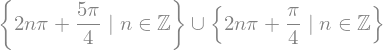

In [108]:
sy.solveset( sy.sin(2*x) - 1,x,sy.Reals)

## Expansão, simplificação e fatoração de polinômios

Vejamos exemplos de polinômios em uma variável. 

In [109]:
a0, a1, a2, a3 = sy.symbols('a0 a1 a2 a3') # coeficientes
P3x = a0 + a1*x + a2*x**2 + a3*x**3 # polinômio de 3o. grau em x
P3x

In [110]:
b0, b1, b2, b3 = sy.symbols('b0 b1 b2 b3') # coeficientes
Q3x = b0 + b1*x + b2*x**2 + b3*x**3 # polinômio de 3o. grau em x
Q3x

In [111]:
R3x = P3x*Q3x # produto polinomial
R3x

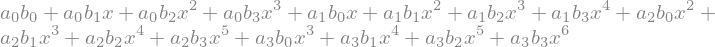

In [112]:
R3x_e = sy.expand(R3x) # expande o produto
R3x_e

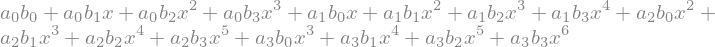

In [113]:
sy.simplify(R3x_e) # simplify às vezes não funciona como esperado

In [114]:
sy.factor(R3x_e) # 'factor' pode funcionar melhor

In [115]:
# simplify funciona para casos mais gerais 
ident_trig = sy.sin(x)**2 + sy.cos(x)**2
ident_trig

In [116]:
sy.simplify(ident_trig)

## Identidades trigonométricas 

Podemos usar `expand_trig` para expandir funções trigonométricas. 

In [117]:
sy.expand_trig( sy.sin(a + b) ) # sin(a+b)

In [118]:
sy.expand_trig( sy.cos(a + b) ) # cos(a+b)

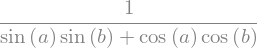

In [119]:
sy.expand_trig( sy.sec(a - b) ) # sec(a-b)

## Propriedades de logaritmo


Com `expand_log`, podemos aplicar propriedades válidas de logaritmo.

In [120]:
sy.expand_log( sy.log(a*b) )

A identidade não foi validada pois `a` e `b` são símbolos irrestritos.

In [121]:
a,b = sy.symbols('a b',positive=True) # impomos que a,b > 0

In [122]:
sy.expand_log( sy.log(a*b) ) # identidade validada

In [123]:
sy.expand_log( sy.log(a/b) )

In [124]:
m = sy.symbols('m', real = True) # impomos que m seja um no. real
sy.expand_log( sy.log(a**m) )

Com `logcombine`, compactamos as propriedades.

In [125]:
sy.logcombine( sy.log(a) + sy.log(b) ) # identidade recombinada

## Fatorial 

A função `factorial(n)` pode ser usada para calcular o fatorial de um número.

In [126]:
sy.factorial(m)

In [127]:
sy.factorial(m).subs(m,10) # 10! 

In [128]:
sy.factorial(10) # diretamente

**Exemplo:** Sejam $m,n,x$ inteiros positivos. Se $f(m) = 2m!$, $g(n) = \frac{(n + 1)!}{n^2!}$ e $h(x) = f(x)g(x)$, qual é o valor de $h(2)$? 

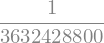

In [129]:
from sympy.abc import m,n,x

f = 2*sy.factorial(m)
g = sy.factorial(n + 1)/sy.factorial(n**2)

h = (f.subs(m,x)*g.subs(n,x)).subs(x,4)
h

## Funções anônimas 

A terceira classe de funções que iremos aprender é a de *funções anônimas*. Uma **função anônima** em Python consiste em uma função cujo nome não é explicitamente definido e que pode ser criada em apenas uma linha de código para executar uma tarefa específica.

Funções anônimas são baseadas na palavra-chave `lambda`. Este nome tem inspiração em uma área da ciência da computação chamada de cálculo-$\lambda$.

Uma função anônima tem a seguinte forma: 

```python
lambda lista_de_parâmetros: expressão
```

Funções anônimas podem são bastante úteis para tornar um código mais conciso. 

Por exemplo, na aula anterior, definimos a função

```python
def repasse(V): 
    return 0.0103*V
```

para calcular o repasse financeiro ao corretor imobiliário. 

Com uma função anônima, a mesma função seria escrita como:

In [130]:
repasse = lambda V: 0.0103*V

Não necessariamente temos que atribui-la a uma variável. Neste caso, teríamos:

In [131]:
lambda V: 0.0103*V

<function __main__.<lambda>(V)>

Para usar a função, passamos um valor:

In [132]:
repasse(100000) # repasse sobre R$ 100.000,00

O modelo completo com "bonificação" seria escrito como:

In [133]:
r3 = lambda c,V,b: c*V + b # aqui há 3 parâmetros necessários

Redefinamos objetos simbólicos:

In [134]:
from sympy.abc import b,c,V
r3(b,c,V)

O resultado anterior continua sendo um objeto simbólico, mas obtido de uma maneira mais direta. Podemos usar funções anônimas para tarefas de menor complexidade.

## "Lambdificação" simbólica

Usando `lambdify`, podemos converter uma expressão simbólica do *sympy* para uma expressão que pode ser numericamente avaliada em outra biblioteca. Essa função desempenha papel similar a uma função *lambda* (anônima).

In [135]:
expressao = sy.sin(x) + sy.sqrt(x) # expressão simbólica
f = sy.lambdify(x,expressao,"math") # lambdificação para o módulo math
f(0.2) # avalia

Para avaliações simples como a anterior, podemos usar `evalf` e `subs`. A lambdificação será útil quando quisermos avaliar uma função em vários pontos, por exemplo. Na próxima aula, introduziremos sequencias e listas. Para mostrar um exemplo de lambdificação melhor veja o seguinte exemplo.

In [136]:
from numpy import arange # importação de função do módulo numpy

X = arange(40) # gera 40 valores de 0 a 39

In [137]:
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [138]:
f = sy.lambdify(x,expressao,"numpy")(X) # avalia 'expressao' em X
f

array([0.        , 1.84147098, 2.32351099, 1.87317082, 1.2431975 ,
       1.2771437 , 2.17007424, 3.30273791, 3.81778537, 3.41211849,
       2.61825655, 2.31663458, 2.9275287 , 4.02571831, 4.73226474,
       4.52327119, 3.71209668, 3.16170813, 3.49165344, 4.50877615,
       5.38508121, 5.41923133, 4.68156445, 3.94961112, 3.99340112,
       4.86764825, 5.86157796, 6.15252835, 5.56240841, 4.72153092,
       4.48919395, 5.16372672, 6.20828093, 6.74447451, 6.36003458,
       5.48789711, 5.00822115, 5.4392244 , 6.46078258, 7.20879338])